#### setting up for like. stuff.

In [1]:
cd gym-baby

/home/natalie/nsalab/Users/naw1/desk2/dl/gym-baby


In [ ]:
# might need this? but only the one time, I think 
pip install -e .

In [2]:
import gym
import gym_baby
import numpy as np
import time

In [3]:
import sys
import math
import random

In [4]:
def get_explore_rate(t,min_explore_rate,decay_fact):
    return max(min_explore_rate, min(0.8, 1.0 - math.log10((t+1)/decay_fact)))


def get_learning_rate(t,min_learning_rate,decay_fact):
    return max(min_learning_rate, min(0.8, 1.0 - math.log10((t+1)/decay_fact)))

In [5]:
# variables: 
neps = 20
tstep = 200
min_explore_rate = 0.1
min_learning_rate = 0.2
#grid_size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
#decay_fact = np.prod(grid_size, dtype=float) / 10.0
decay_fact = 10/10.0
#state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
explore_rate = get_explore_rate(0,min_explore_rate,decay_fact)
learning_rate = get_learning_rate(0,min_learning_rate,decay_fact)

In [6]:
def select_action(env,state, q_table,explore_rate):
    # Select a random action
    if random.random() < explore_rate:
        action = env.action_space.sample()
    # Select the action with the highest q
    else:
        action = int(np.argmax(q_table[state]))
    return action

In [7]:
def state_to_bucket(state,env):
    grid_size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
    state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
    bucket_indice = []
    for i in range(len(state)):
        if state[i] <= state_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_bounds[i][1]:
            bucket_index = grid_size[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = state_bounds[i][1] - state_bounds[i][0]
            offset = (grid_size[i]-1)*state_bounds[i][0]/bound_width
            scaling = (grid_size[i]-1)/bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indice.append(bucket_index)
    return tuple(bucket_indice)

In [8]:
def run_qlearn(env,q_table, explore_rate, learning_rate, neps=200,tstep=1000):
    env.render()
    discount_factor = 0.99
    for ep in range(neps):
        obv = env.reset()
        print(ep)
        state_0 = state_to_bucket(obv,env)
        total_reward = 0
        
        for t in range(tstep):
            # select best action and execute
            action = select_action(env,state_0, q_table, explore_rate)
            obv,reward,done,_ = env.step(action)
            
            # update the state you are in, add reward (observe result)
            state = state_to_bucket(obv,env)
            total_reward += reward
            
            # update Q-table
            best_q = np.amax(q_table[state])
            q_table[state_0 + (action,)] += learning_rate * (reward + discount_factor * (best_q) - q_table[state_0 + (action,)])
            
            # update state
            state_0 = state
            
            env.render()
            time.sleep(0.05)
            
            
            # update parameters
            #explore_rate = get_explore_rate(ep,min_explore_rate,decay_fact)
            #learning_rate = get_learning_rate(ep,min_learning_rate,decay_fact)
            
            if done:
                env.reset()
                print("Episode finished after {} timesteps".format(t+1))
                time.sleep(2)
                break
                
    return q_table

In [9]:
q_table0 = np.zeros((10,10) + (4,), dtype=float)

In [10]:
fin_q_table = run_qlearn(gym.make('maze-v0'),q_table0,explore_rate,learning_rate)

0
1
2
3
Episode finished after 61 timesteps
4
5
Episode finished after 16 timesteps
6
7
Episode finished after 82 timesteps
8
Episode finished after 81 timesteps
9
Episode finished after 65 timesteps
10
Episode finished after 87 timesteps
11
Episode finished after 93 timesteps
12
13
Episode finished after 27 timesteps
14
Episode finished after 37 timesteps
15
Episode finished after 35 timesteps
16
Episode finished after 63 timesteps
17
Episode finished after 39 timesteps
18
19
Episode finished after 13 timesteps


### Q-table is of size (10x10x4) ((grid)x#actions) 

#### ACTION = ["N", "S", "E", "W"]

In [12]:
fin_q_table.shape

(10, 10, 4)

## bro idk why it gave me the same q-table, idk run it for more epochs?? I'll debug more l8r

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Q-Table for move West (left)')

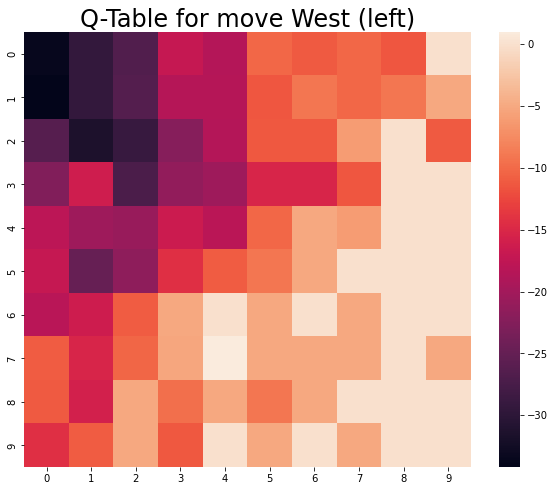

In [27]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(fin_q_table[:,:,3])
sns.set(font_scale=2)
ax.set_title('Q-Table for move West (left)')

Text(0.5, 1.0, 'Q-Table for move East (right)')

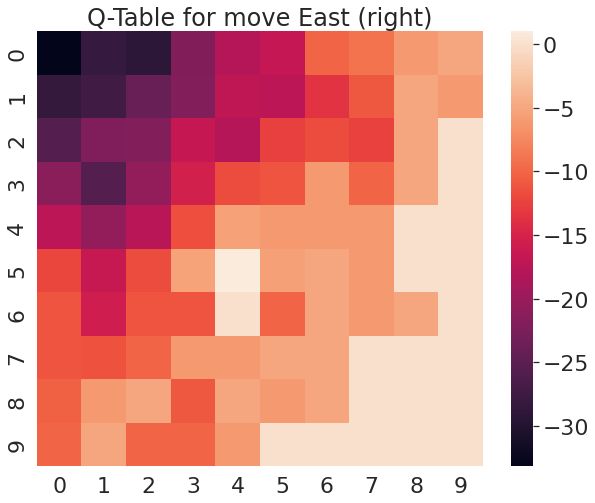

In [28]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(fin_q_table[:,:,2])
sns.set(font_scale=2)
ax.set_title('Q-Table for move East (right)')

Text(0.5, 1.0, 'Q-Table for move South (down)')

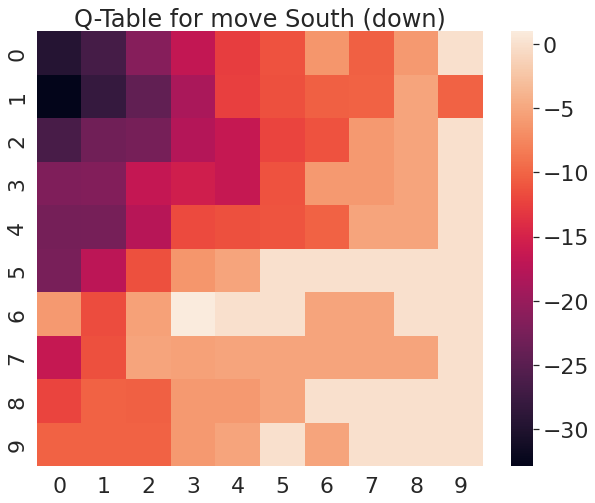

In [29]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(fin_q_table[:,:,1])
sns.set(font_scale=2)
ax.set_title('Q-Table for move South (down)')

Text(0.5, 1.0, 'Q-Table for move North (up)')

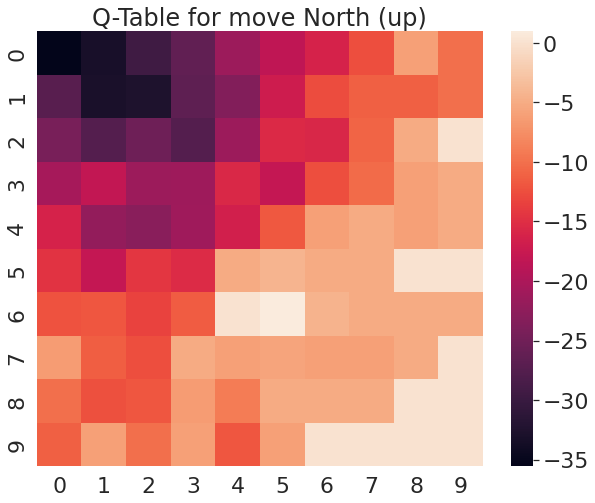

In [30]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(fin_q_table[:,:,0])
sns.set(font_scale=2)
ax.set_title('Q-Table for move North (up)')